In [62]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
input_path = os.path.join("..","Clean_Data")
output_path = os.path.join("..","Graphs")
min_games_played = 16

In [3]:
complete_df = pd.read_csv(input_path +'/total_players.csv')
display(complete_df.sort_values(by='nameFull'))

,playerId,nameFull,position,teamId,gameId,fumbles,interceptions,sacks,#players-pos-league,#games-pos-league,#fumbles-pos-league,#int-pos-league,#sacks-pos-league
2304,20160046.0,A'Shawn Robinson,DT,1540.0,91.0,NaN,4.0,8.0,580.0,37418.0,2.0,88.0,3901.0
1027,20130717.0,A.J. Bouye,DB,2120.0,134.0,NaN,34.0,4.0,1104.0,51097.0,283.0,3715.0,841.0
2573,20130717.0,A.J. Bouye,DB,2250.0,134.0,NaN,34.0,4.0,1104.0,51097.0,283.0,3715.0,841.0
3510,20190911.0,A.J. Cole,P,2520.0,4.0,1.0,NaN,NaN,2.0,8.0,1.0,0.0,0.0
206,20100119.0,A.J. Edds,LB,3430.0,8.0,NaN,NaN,NaN,867.0,41106.0,32.0,874.0,4707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,20140900.0,NaN,NaN,2510.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,20170455.0,NaN,NaN,325.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2257,20160983.0,NaN,NaN,2510.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
games = pd.read_csv('../../Resources/games.csv')
games = games[games['season']>=2014]
games_home = games[['gameId','homeTeamId']]
games_home = games_home.groupby('homeTeamId').count()
games_home = games_home.reset_index().rename(columns={'homeTeamId':'teamId'})
# display(games_home)
games_visit = games[['gameId','visitorTeamId']]
games_visit = games_visit.groupby('visitorTeamId').count()
games_visit = games_visit.reset_index().rename(columns={'visitorTeamId':'teamId'})
# display(games_visit)
games_total = pd.DataFrame.merge(games_home,games_visit,how='left',on='teamId')
games_total['total_games'] = games_total['gameId_x'] + games_total['gameId_y']
games_total = games_total[['teamId','total_games']]
display(games_total)

,teamId,total_games
0,200,126
1,325,125
2,610,123
3,750,126
4,810,121
5,920,122
6,1050,120
7,1200,125
8,1400,125
9,1540,122


In [69]:
team_plays = complete_df[['playerId','nameFull','position','teamId','gameId','fumbles','interceptions','sacks']]
team_plays = team_plays.groupby('teamId').sum()
team_plays = team_plays.reset_index()
team_plays = pd.DataFrame.merge(team_plays,games_total,how='left',on='teamId')
team_plays = team_plays[['teamId','total_games','fumbles','interceptions','sacks']]
team_plays['total_defensive_plays'] = team_plays['fumbles'] + team_plays['interceptions'] + team_plays['sacks']
team_plays['avg_fumbles'] = team_plays['fumbles'] / team_plays['total_games']
team_plays['avg_interceptions'] = team_plays['interceptions'] / team_plays['total_games']
team_plays['avg_sacks'] = team_plays['sacks'] / team_plays['total_games']
team_plays['avg_total_plays'] = team_plays['total_defensive_plays'] / team_plays['total_games']
average_team_stats = team_plays[['teamId','avg_fumbles','avg_interceptions','avg_sacks','avg_total_plays']]
average_team_stats

,teamId,avg_fumbles,avg_interceptions,avg_sacks,avg_total_plays
0,200.0,0.174603,1.222222,3.587302,4.984127
1,325.0,0.144000,2.056000,5.232000,7.432000
2,610.0,0.373984,2.292683,4.739837,7.406504
3,750.0,0.063492,1.730159,5.785714,7.579365
4,810.0,0.066116,1.462810,5.041322,6.570248
5,920.0,0.221311,1.286885,3.860656,5.368852
6,1050.0,0.133333,2.541667,6.225000,8.900000
7,1200.0,0.056000,1.680000,4.888000,6.624000
8,1400.0,0.112000,1.256000,4.488000,5.856000
9,1540.0,0.139344,1.663934,6.040984,7.844262


In [12]:
points_per_team = pd.read_csv(input_path +'/points_x_team.csv')
display(points_per_team)

,teamId,visitingTeamFinalScore,homeTeamFinalScore,total_points
0,200,23.062500,23.225806,23.144153
1,325,17.349206,20.741935,19.045571
2,610,20.459016,20.741935,20.600476
3,750,20.920635,24.571429,22.746032
4,810,20.770492,23.066667,21.918579
5,920,21.704918,21.803279,21.754098
6,1050,22.183333,24.233333,23.208333
7,1200,21.843750,20.295082,21.069416
8,1400,19.062500,20.278689,19.670594
9,1540,22.100000,22.403226,22.251613


In [83]:
team_stats = pd.DataFrame.merge(team_plays,points_per_team,how='left',on='teamId')
comparison_team_stats = team_stats[['teamId','avg_fumbles','avg_interceptions','avg_sacks','avg_total_plays','total_points']]
display(comparison_team_stats.sort_values(by='total_points'))

,teamId,avg_fumbles,avg_interceptions,avg_sacks,avg_total_plays,total_points
20,3200.0,0.125926,1.948148,6.429630,8.503704,18.742857
19,3000.0,0.293651,1.341270,3.738095,5.373016,18.904762
1,325.0,0.144000,2.056000,5.232000,7.432000,19.045571
29,4600.0,0.115385,1.653846,6.261538,8.030769,19.652699
8,1400.0,0.112000,1.256000,4.488000,5.856000,19.670594
15,2310.0,0.147287,1.713178,5.883721,7.744186,20.370607
2,610.0,0.373984,2.292683,4.739837,7.406504,20.600476
26,3900.0,0.039370,1.629921,4.464567,6.133858,20.898313
7,1200.0,0.056000,1.680000,4.888000,6.624000,21.069416
12,2120.0,0.144000,2.304000,4.200000,6.648000,21.544419


<IPython.core.display.Javascript object>


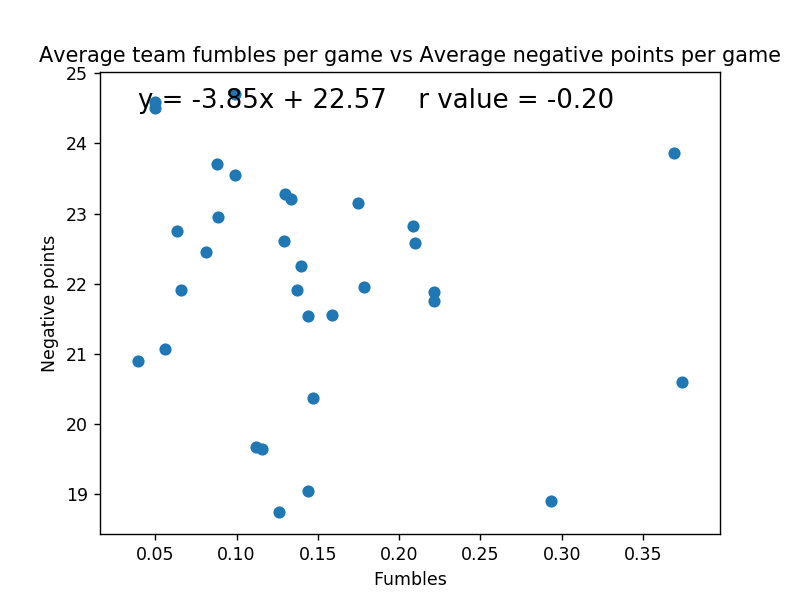

<IPython.core.display.Javascript object>


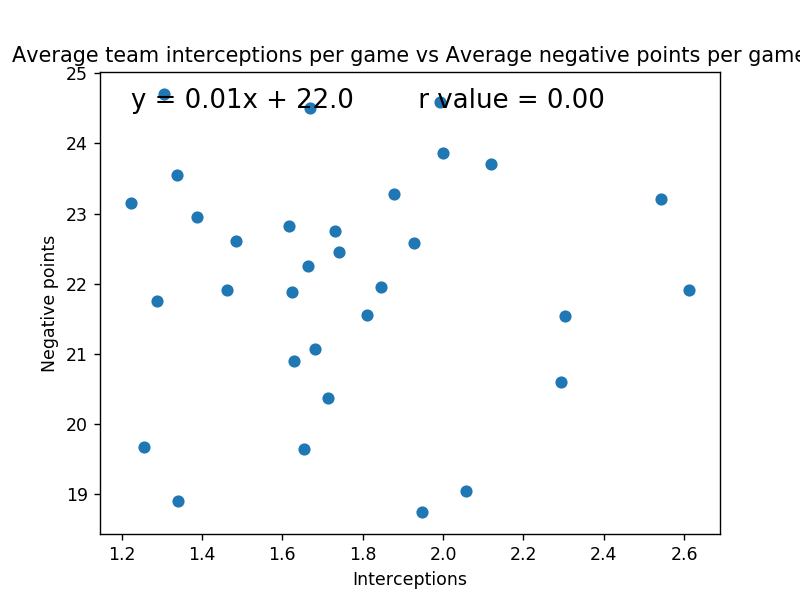

<IPython.core.display.Javascript object>


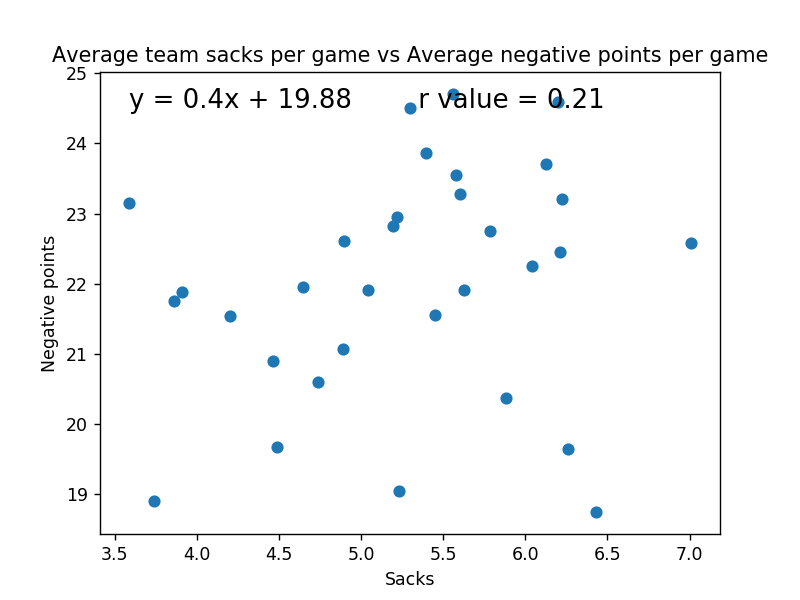

<IPython.core.display.Javascript object>


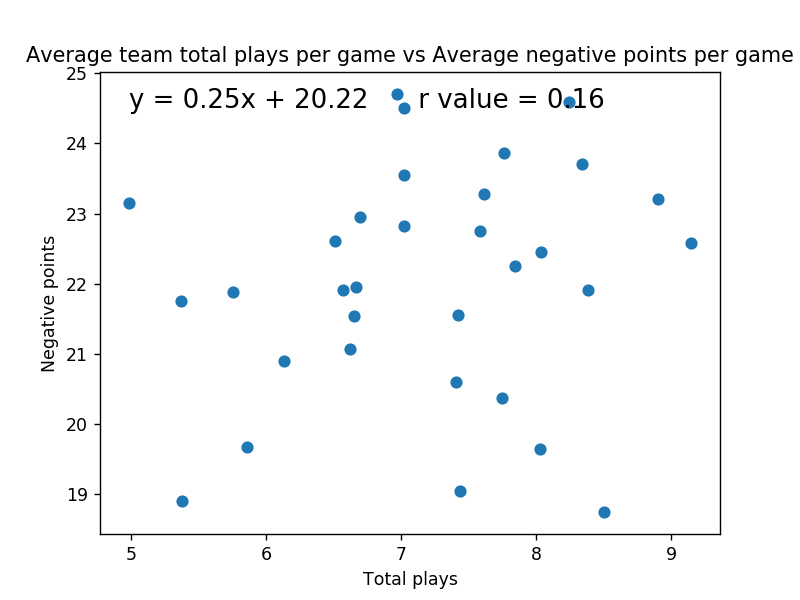

In [82]:
plays = ['avg_fumbles','avg_interceptions','avg_sacks','avg_total_plays']

for play in plays:
    fig, ax = plt.subplots()
    ax.scatter(comparison_team_stats[play], comparison_team_stats['total_points'] ) 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(comparison_team_stats[play], comparison_team_stats['total_points'])
    regress_values = comparison_team_stats['total_points'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    rval=f' r value = {"{:.2f}".format(rvalue)}'
    midx=comparison_team_stats[play].min()+((comparison_team_stats[play].max()-comparison_team_stats[play].min())/2)
    plt.annotate(line_eq,(comparison_team_stats[play].min(),24.5),fontsize=15,color="black")
    plt.annotate(rval,(midx,24.5),fontsize=15,color="black")
    if play == 'avg_fumbles':
        label = 'fumbles'
    elif play == 'avg_interceptions':
        label = 'interceptions'
    elif play == 'avg_sacks':
        label = 'sacks'
    elif play == 'avg_total_plays':
        label = 'total plays'
    ax.set(xlabel=label.capitalize(), ylabel='Negative points')
    ax.set_title(f'Average team {label} per game vs Average negative points per game')
    plt.show()